<a href="https://colab.research.google.com/github/JanaviC/CODSOFT/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
data=pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
#Dimension of the dataset
data.shape

(10000, 14)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [16]:
data.drop(["RowNumber","CustomerId","Surname"],axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
data=pd.get_dummies(data,drop_first=True)

In [21]:
data.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0


In [27]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [34]:
X=data.drop(["Exited"],axis=1)

In [35]:
X

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,0,0,0,0,0,0,0,0,0,1
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,0,0,0,0,0,0,0,0,0,1
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,0,0,0,0,0,0,0,0,0,0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,0,0,0,0,0,0,0,1,0,1


In [36]:
y=data["Exited"]

In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=92,stratify=y)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc=StandardScaler()

In [45]:
X_train=sc.fit_transform(X_train)

In [46]:
X_test=sc.transform(X_test)

In [48]:
X_train

array([[ 1.02597693, -0.7591661 , -0.69676682, ..., -0.5808144 ,
        -0.57119169,  0.91809223],
       [-1.13773411, -0.38795959, -0.17954751, ...,  1.72172039,
        -0.57119169, -1.08921519],
       [ 1.41489626,  1.3907342 ,  0.65834777, ..., -0.5808144 ,
        -0.57119169,  0.91809223],
       ...,
       [ 0.35335483, -1.53038286, -1.68982788, ..., -0.5808144 ,
         1.75072575,  0.91809223],
       [ 0.95062381,  1.58339924, -1.03813156, ..., -0.5808144 ,
        -0.57119169,  0.91809223],
       [ 1.36003085, -0.22582374, -0.84158822, ..., -0.5808144 ,
        -0.57119169, -1.08921519]])

In [49]:
X_test

array([[-0.02445252,  1.29849265, -0.60366734, ..., -0.5808144 ,
        -0.57119169,  0.91809223],
       [ 0.6610178 , -1.43510787,  0.0376846 , ..., -0.5808144 ,
        -0.57119169, -1.08921519],
       [-1.03321204, -0.18400961,  0.182506  , ..., -0.5808144 ,
         1.75072575, -1.08921519],
       ...,
       [ 0.31724089,  0.92101054, -0.57263418, ..., -0.5808144 ,
        -0.57119169, -1.08921519],
       [ 0.0220789 ,  0.40778905,  0.51352636, ..., -0.5808144 ,
        -0.57119169, -1.08921519],
       [ 1.11799802,  0.57515689, -0.7071112 , ..., -0.5808144 ,
         1.75072575,  0.91809223]])



 **Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log=LogisticRegression()

In [53]:
log.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred1=log.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test,y_pred1)

0.7625

In [59]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [61]:
precision_score(y_test,y_pred1)

0.35833333333333334

In [62]:
recall_score(y_test,y_pred1)

0.2113022113022113

In [63]:
f1_score(y_test,y_pred1)

0.2658423493044822

**KNN**

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier()

In [71]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [72]:
y_pred3=knn.predict(X_test)

In [73]:
accuracy_score(y_test,y_pred3)

0.7815

In [74]:
precision_score(y_test,y_pred3)

0.27941176470588236

**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf=RandomForestClassifier()

In [77]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [79]:
y_pred4=rf.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred4)

0.8425

In [81]:
precision_score(y_test,y_pred4)

0.8026315789473685

In [85]:
final_data=pd.DataFrame({'MODELS':['LR','KNN','RF'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4)]})

In [86]:
final_data

,MODELS,ACC
0,LR,0.7625
1,KNN,0.7815
2,RF,0.8425


<Axes: xlabel='MODELS', ylabel='ACC'>

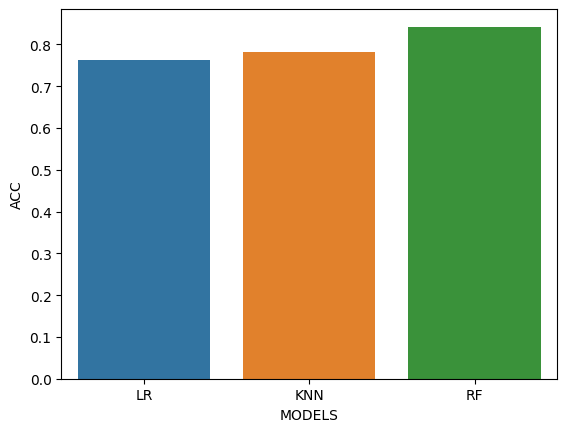

In [96]:
import seaborn as sns
sns.barplot(x=final_data['MODELS'],y=final_data['ACC'])

In [98]:
final_data1=pd.DataFrame({'MODELS':['LR','KNN','RF'],'PREC':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred3),precision_score(y_test,y_pred4)]})

In [99]:
final_data1


,MODELS,PREC
0,LR,0.358333
1,KNN,0.279412
2,RF,0.802632


<Axes: xlabel='MODELS', ylabel='PREC'>

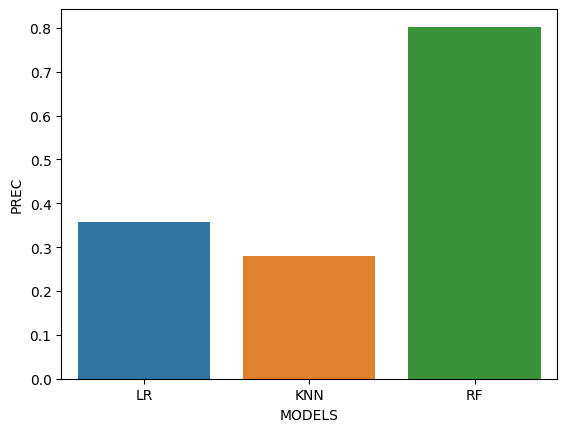

In [100]:
sns.barplot(x=final_data['MODELS'],y=final_data['PREC'])

Here in the graph,it shows that Random Forest Classifier is the best model.